# Churn Data preprocessing

In [1]:
#Read CSV File
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('churn_clean.csv')
churn_data=df
churn_data

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [2]:
#create function to check for missing values in the data

def count_of_null(churn_data):
    count=churn_data.isnull().sum().sum()
    return count

In [3]:
# print missing value count in the data
count_null = count_of_null(churn_data)
print(count_null)

0


In [4]:
#create function to check duplicate values in the data
def check_duplicates(churn_data):
    count=churn_data.duplicated().sum().sum()
    return count

In [5]:
# print duplicate values in the data
count_duplicates = check_duplicates(churn_data)
print(count_duplicates)

0


In [6]:
#create a function to check information about the data
def about_data (churn_data):
        about=churn_data.info()
        return about

In [7]:
#print information about the data
info=about_data (churn_data)
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [8]:
churn_data.Gender.unique

<bound method Series.unique of 0         Male
1       Female
2       Female
3         Male
4         Male
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999      Male
Name: Gender, Length: 10000, dtype: object>

In [9]:
#Create function to check statistical summary of the dataset
def stat_summary (churn_data):
    statistics_sum = churn_data.describe()
    return statistics_sum
#print statistical summary of data
summary = stat_summary (churn_data)
summary

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [10]:
#create function to find columns with Categorical Values

def categorcal_columns (churn_data):
    cat_cols= churn_data.select_dtypes(exclude=['int','float']).columns.tolist()
    return cat_cols
#print categorical columns
categorical = categorcal_columns (churn_data)
categorical

['Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Area',
 'TimeZone',
 'Job',
 'Marital',
 'Gender',
 'Churn',
 'Techie',
 'Contract',
 'Port_modem',
 'Tablet',
 'InternetService',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']

In [11]:
#create function to find columns with Numerical Values

def numerical_columns (churn_data):
    num_cols = churn_data.select_dtypes(include=['int','float']).columns.tolist()
    return num_cols
#print numerical columns
numerical = numerical_columns (churn_data)
numerical

['CaseOrder',
 'Zip',
 'Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']

# Data cleaning

In [12]:
#drop irrelant columns
churn_data=churn_data.drop(columns=['Item1','Item2','Item3','Item4','Item5','Item6',
                                    'Item7','Item8','Customer_id','Interaction','UID',
                                    'TimeZone','CaseOrder','Zip'])
churn_data

,City,State,County,Lat,Lng,Population,Area,Job,Children,Age,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,Point Baker,AK,Prince of Wales-Hyder,56.25100,-133.37571,38,Urban,Environmental health practitioner,0,68,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,West Branch,MI,Ogemaw,44.32893,-84.24080,10446,Urban,"Programmer, multimedia",1,27,...,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,Yamhill,OR,Yamhill,45.35589,-123.24657,3735,Urban,Chief Financial Officer,4,50,...,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,Del Mar,CA,San Diego,32.96687,-117.24798,13863,Suburban,Solicitor,1,48,...,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,Needville,TX,Fort Bend,29.38012,-95.80673,11352,Suburban,Medical illustrator,0,83,...,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Mount Holly,VT,Rutland,43.43391,-72.78734,640,Rural,Sport and exercise psychologist,3,23,...,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601
9996,Clarksville,TN,Montgomery,36.56907,-87.41694,77168,Rural,Consulting civil engineer,4,48,...,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810
9997,Mobeetie,TX,Wheeler,35.52039,-100.44180,406,Rural,IT technical support officer,1,48,...,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799
9998,Carrollton,GA,Carroll,33.58016,-85.13241,35575,Urban,Water engineer,1,39,...,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752


In [13]:
#Removing extra spaces from the features Using strip()
churn_data.columns = churn_data.columns.str.strip()

In [14]:
#Finding Outliers using IQR score

#The IQR is the first quartile subtracted from the third quartile; 
#these quartiles can be clearly seen on a box plot on the data.
# calculate IQR score
Q1 = churn_data.quantile(0.25)
Q3 = churn_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# IQR of each column

Lat                         6.765080
Lng                        16.994067
Population              12430.000000
Children                    3.000000
Age                        36.000000
Income                  34021.452500
Outage_sec_perweek          3.951271
Email                       4.000000
Contacts                    2.000000
Yearly_equip_failure        1.000000
Tenure                     53.562101
MonthlyCharge              60.755486
Bandwidth_GB_Year        4349.670543
dtype: float64


In [15]:
#remove outlier
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

new_churn_data = churn_data[~((churn_data < (Q1 - 1.5 * IQR)) |(churn_data > (Q3 + 1.5 * IQR))).any(axis=1)]
new_churn_data .shape

(7973, 36)

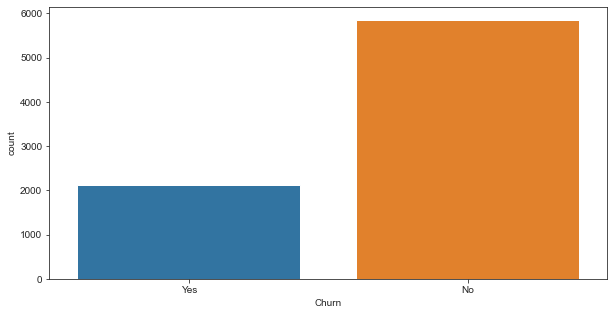

In [16]:
#Distribution of Churn in the data 
#countplot showing numbers of Yes and No
warnings.simplefilter(action="ignore", category=FutureWarning)

sns.set_style('ticks')
plt.figure(figsize = (10, 5))
sns.countplot(new_churn_data['Churn']);
plt.show()

In [17]:
#Estimating the data-points for target class 
new_churn_data['Churn'].value_counts()

No     5850
Yes    2123
Name: Churn, dtype: int64

In [18]:
# load cleaned churn dataframe into CSV file.
new_churn_data.to_csv('Fixed_churn_data.csv', index=False, header=True)

 # crm data preprocessing

In [19]:
df=pd.read_csv('crm1.csv')
crm_data=df
crm_data

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment
0,aeef4233d9ad34e41f7ecf48d64646f8,MALE,1985.0,ACTIVE,Prepaid,Tier_3
1,2397d009e705bc8a2654cbb3f480cc59,MALE,1958.0,ACTIVE,Prepaid,Tier_3
2,6f05d738919f9283322bae17dc366bf5,MALE,1976.0,ACTIVE,Prepaid,Tier_3
3,45352d9d126f86f40c7eee79a82c833c,MALE,1996.0,ACTIVE,Prepaid,Tier_3
4,959b00a279e2785cfa81728338c324f7,FEMALE,1960.0,ACTIVE,Prepaid,Tier_3
...,...,...,...,...,...,...
13627488,be38c74c3e2a56c9a364f22dcec0767c,NaN,1983.0,ACTIVE,Prepaid,Tier_3
13627489,37eac64c097badb6ee39c846b63f4c6c,NaN,1980.0,ACTIVE,Prepaid,Tier_3
13627490,3b8f3d93bab8f72f403fe59ce070c2a6,Male,1973.0,ACTIVE,Prepaid,Tier_3
13627491,52c53173d02ccdffac08712fcff12132,NaN,1989.0,ACTIVE,Prepaid,Tier_3


In [20]:
#create function to check for sum missing values in the data

def count_of_null(crm_data):
    count=crm_data.isnull().sum().sum()
    return count
# print missing value count in the data
count_null = count_of_null(crm_data)
print(count_null)

2682744


In [21]:
#create function to check for count  missing values in the data per column

def list_missing_value(crm_data):
    count=crm_data.isnull().sum()
    return count
#print list of missing values per column
count_null_list=list_missing_value(crm_data)
print(count_null_list)

msisdn                 0
gender           2679804
year_of_birth       2940
system_status          0
mobile_type            0
value_segment          0
dtype: int64


In [22]:
#create function to check duplicate values in the data
def check_duplicates(crm_data):
    count=crm_data.duplicated().sum().sum()
    return count
# print duplicate values in the data
count_duplicates = check_duplicates(crm_data)
print(count_duplicates)

4373


In [23]:
#Finding Outliers using IQR score

#The IQR is the first quartile subtracted from the third quartile; 
#these quartiles can be clearly seen on a box plot on the data.

Q1 = crm_data.quantile(0.25)
Q3 = crm_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# IQR of each column

year_of_birth    15.0
dtype: float64


In [24]:
#create a function to check information about the data
def about_data (crm_data):
        about=crm_data.info()
        return about
#print information about the data
info=about_data (crm_data)
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13627493 entries, 0 to 13627492
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   msisdn         object 
 1   gender         object 
 2   year_of_birth  float64
 3   system_status  object 
 4   mobile_type    object 
 5   value_segment  object 
dtypes: float64(1), object(5)
memory usage: 623.8+ MB
None


In [25]:
#Create function to check statistical summary of the dataset
def stat_summary (crm_data):
    statistics_sum = crm_data.describe()
    return statistics_sum
#print statistical summary of data
summary = stat_summary (crm_data)
summary

,year_of_birth
count,1.362455e+07
mean,1.979816e+03
std,1.123304e+01
min,1.900000e+03
25%,1.973000e+03
50%,1.982000e+03
75%,1.988000e+03
max,2.046000e+03


In [26]:
#create function to find columns with Categorical Values

def categorcal_columns (crm_data):
    cat_cols= crm_data.select_dtypes(exclude=['int','float']).columns.tolist()
    return cat_cols
#print categorical columns
categorical = categorcal_columns (crm_data)
categorical

['msisdn', 'gender', 'system_status', 'mobile_type', 'value_segment']

In [27]:
#create function to find columns with Numerical Values

def numerical_columns (crm_data):
    num_cols = crm_data.select_dtypes(include=['int','float']).columns.tolist()
    return num_cols
#print numerical columns
numerical = numerical_columns (crm_data)
numerical

['year_of_birth']

# crm data cleaning 

#remove null #remove duplicate #remove outlier

In [28]:
#remove null
crm_data= crm_data.dropna()
crm_data = crm_data.reset_index(drop=True)

In [29]:
#print list of missing values per column
count_null_list=list_missing_value(crm_data)
print(count_null_list)

msisdn           0
gender           0
year_of_birth    0
system_status    0
mobile_type      0
value_segment    0
dtype: int64


In [30]:
#drop irrelant column
crm_data=crm_data.drop(columns=['msisdn'])
crm_data

,gender,year_of_birth,system_status,mobile_type,value_segment
0,MALE,1985.0,ACTIVE,Prepaid,Tier_3
1,MALE,1958.0,ACTIVE,Prepaid,Tier_3
2,MALE,1976.0,ACTIVE,Prepaid,Tier_3
3,MALE,1996.0,ACTIVE,Prepaid,Tier_3
4,FEMALE,1960.0,ACTIVE,Prepaid,Tier_3
...,...,...,...,...,...
10945562,Male,1984.0,ACTIVE,Prepaid,Tier_3
10945563,Male,1991.0,ACTIVE,Prepaid,Tier_3
10945564,Male,1987.0,ACTIVE,Prepaid,Tier_3
10945565,Male,1973.0,ACTIVE,Prepaid,Tier_3


In [31]:
#remove duplicate
# remove duplicates based columns
crm_data = crm_data.drop_duplicates()
crm_data = crm_data.reset_index(drop=True)

In [32]:
# print duplicate values in the data
count_duplicates = check_duplicates(crm_data)
print(count_duplicates)

0


In [33]:
#data shape
crm_data.shape

(1823, 5)

In [34]:
#unique values of year of gender
crm_data.gender.unique()

array(['MALE', 'FEMALE', 'Male', 'Female', 'Not Available', 'male', 'M',
       'Female.', 'F', 'Female3', '.', 'U', 'female', '3', 'P', 'Other',
       'Female]', ']', '+', 'FE', '16/10', 'Female`', 'FemaleF', 'B', '`',
       '1', 'Female..', 'Femal]e', '!', 'Q', 'W', 'qqqq', '0.0-', 'Male.',
       'FEMELE', '~', 'MaFEle', '20/1/1966', '``', 'mALE', 'D', '\\\\',
       'MaleF', 'DF', 'S', 'A', 'Mal', '0', 'O', 'FemaleH', '```',
       'TEACHER', 'A/N', 'MFEale', '11', 'MA', 'q', 'MalFEe', 'H',
       'Female\\\\', 'FAMALE', '333', '21', 'HOWZ WIFE', 'PR',
       '25/5/1978', 'Femal', 'FEMAL', 'MY', '6', '05/01/1958', 'swdwdxw',
       'K', 'Male`', '22/8/1980', 'J', 'FEMEL'], dtype=object)

In [35]:
# Convert all strings in the gender column to lowercase
crm_data['gender'] = crm_data['gender'].str.lower()

# Replace values other than 'male' and 'female' with NaN
crm_data['gender'] = crm_data['gender'].apply(lambda x: x if x in ['male', 'female'] else pd.np.nan)

# Drop rows with NaN values in Gender column
crm_data.dropna(subset=['gender'], inplace=True)

# Replace 'male' with 'Male' and 'female' with 'Female'
crm_data['gender'] = crm_data['gender'].apply(lambda x: 'Male' if x == 'male' else 'Female')

In [36]:
crm_data.gender.unique()

array(['Male', 'Female'], dtype=object)

In [37]:
crm_data.year_of_birth.unique()

array([1985., 1958., 1976., 1996., 1960., 1994., 1992., 1963., 1978.,
       1981., 1997., 1980., 1990., 1977., 1987., 1986., 1991., 1993.,
       1968., 1988., 1999., 1984., 1989., 1982., 1970., 1979., 1971.,
       1959., 1995., 1973., 1957., 1953., 1965., 1983., 1955., 1936.,
       1974., 1972., 1969., 1975., 1966., 1967., 1956., 1962., 1954.,
       1949., 1961., 1948., 1947., 1964., 1998., 1952., 1945., 1951.,
       1946., 1937., 1940., 1942., 1950., 1943., 1935., 1938., 1928.,
       1944., 2017., 1941., 1931., 1927., 1939., 1930., 1933., 2000.,
       1932., 1918., 2011., 1934., 1929., 1922., 1917., 1915., 1925.,
       1926., 2018., 1919., 1905., 1924., 1921., 1912., 1920., 1911.,
       1923., 1914., 2001., 2014., 2008., 2007., 1906., 2002., 1908.,
       2006., 1913., 1916., 2003., 2015., 2004., 1910., 2016., 1900.,
       2019., 2046., 2009., 1901., 2013., 1907., 2012., 2005., 1909.,
       2045., 1904., 2010., 1902., 2042.])

In [38]:
# calculate IQR for column 'year_of_birth'
Q1 = crm_data['year_of_birth'].quantile(0.25)
Q3 = crm_data['year_of_birth'].quantile(0.75)
IQR = Q3 - Q1

# calculate lower and upper bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# create new DataFrame without outliers
new_crm_data = crm_data[(crm_data['year_of_birth'] >= lower_bound) & (crm_data['year_of_birth'] <= upper_bound)]
new_crm_data.shape

(1161, 5)

In [39]:
#unique values of year of birth
new_crm_data.year_of_birth.unique()

array([1985., 1958., 1976., 1996., 1960., 1994., 1992., 1963., 1978.,
       1981., 1997., 1980., 1990., 1977., 1987., 1986., 1991., 1993.,
       1968., 1988., 1999., 1984., 1989., 1982., 1970., 1979., 1971.,
       1959., 1995., 1973., 1957., 1953., 1965., 1983., 1955., 1936.,
       1974., 1972., 1969., 1975., 1966., 1967., 1956., 1962., 1954.,
       1949., 1961., 1948., 1947., 1964., 1998., 1952., 1945., 1951.,
       1946., 1937., 1940., 1942., 1950., 1943., 1935., 1938., 1928.,
       1944., 2017., 1941., 1931., 1927., 1939., 1930., 1933., 2000.,
       1932., 1918., 2011., 1934., 1929., 1922., 1917., 1915., 1925.,
       1926., 2018., 1919., 1905., 1924., 1921., 1912., 1920., 1911.,
       1923., 1914., 2001., 2014., 2008., 2007., 1906., 2002., 1908.,
       2006., 1913., 1916., 2003., 2015., 2004., 1910., 2016., 1900.,
       2019., 2009., 1901., 2013., 1907., 2012., 2005., 1909., 1904.,
       2010., 1902.])

In [40]:
# load cleaned crm  dataframe into CSV file.
new_crm_data.to_csv('Fixed_crm_data.csv', index=False, header=True)